# XGBoost

In [ ]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url_train = '/content/sample_data/development_dataset.csv'
#url_train = 'itrImputed.csv' #traing dataset
#url_dict = './Dataset/Data_Dictionary.xlsx' #data dictionary
#url_lead = 'itrImputedlead.csv' 
url_lead = '/content/sample_data/leaderboard_dataset.csv'

In [ ]:
## making dataframe
#df_raw = pd.read_csv(url_raw)
df_train = pd.read_csv(url_train)
#df_dict = pd.read_excel(url_dict)
df_lead = pd.read_csv(url_lead)

#df_lead_raw = pd.read_csv(url_lead_raw)

In [ ]:
#imp_lead = pd.read_csv('itrImputedlead.csv')

In [ ]:
#del imp_lead['Unnamed: 0']

In [ ]:
#imp_lead.head()

In [ ]:
df_train.head(), len(df_train), len(df_lead)

(   VAR1        VAR2      VAR3        VAR4  ...  VAR18  VAR19       VAR20   VAR21
 0     1  828.235294  0.138889  321.428571  ...      1      0  100.104991     Low
 1     2  911.764706  0.027778         NaN  ...      0      1  146.654045    High
 2     3  962.352941  0.833333   35.714286  ...      0      0   98.249570  Medium
 3     4  892.941177       NaN         NaN  ...      1      0  140.862306     Low
 4     5  914.117647  0.083333         NaN  ...      1      0  101.268503    High
 
 [5 rows x 21 columns], 34000, 10000)

In [ ]:
(df_train.isna().sum()/len(df_train))*100, sum(df_train.isna().sum())

(VAR1      0.000000
 VAR2      2.826471
 VAR3      9.955882
 VAR4     36.747059
 VAR5      0.002941
 VAR6     10.279412
 VAR7      2.455882
 VAR8      2.455882
 VAR9     46.520588
 VAR10    13.382353
 VAR11    22.250000
 VAR12    30.888235
 VAR13    25.064706
 VAR14     0.000000
 VAR15    23.600000
 VAR16     2.547059
 VAR17    65.276471
 VAR18     0.000000
 VAR19     0.000000
 VAR20     0.000000
 VAR21     0.000000
 dtype: float64, 100046)

In [ ]:
df_train = df_train.replace(to_replace = '.', value =np.nan)
df_lead = df_lead.replace(to_replace = '.', value =np.nan)

In [ ]:
sum(df_train.isna().sum())

100319

In [ ]:
del df_train['Unnamed: 0']
del df_train['0']

In [ ]:
#df_train = df_train.iloc[:,1:]
df_train.head(), len(df_train)

In [ ]:
lead_key = df_lead['VAR1'].tolist()
#print(lead_key)

In [ ]:
#df_lead = df_lead.iloc[:,1:]
df_lead.head().isna().sum()

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)
#X_lead = sc_X.transform(X_lead)
#X_oth = sc_X.fit_transform(X_oth)
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [ ]:
def percentile_linear(columns):
    size = len(columns)-1
    y = columns.rank(method='min').apply(lambda x: (x-1)/size)
    return y

In [ ]:
# for i in df_train.columns[1:-1]:
#     df_train[i] = percentile_linear(df_train[i])

In [ ]:
# for i in df_lead.columns[1:]:
#     df_lead[i] = percentile_linear(df_lead[i])

In [ ]:
#df_train.columns

In [ ]:
#df_lead.head()

#### Dropping features

In [ ]:
drop_list1 = ['VAR5','VAR11','VAR17']
drop_list2 = ['VAR19','VAR18']
drop_list3 = ['VAR14'] #9

In [ ]:
df_train = df_train.drop(drop_list2,axis=1)
df_lead = df_lead.drop(drop_list2,axis=1)

In [ ]:
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.0,1.0,1.540594,NaN,100.104991,1
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,NaN,1.614613,NaN,146.654045,0
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,210.175146,10.0,10.0,1.044599,NaN,98.249570,2
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,NaN,NaN,NaN,1.145729,NaN,140.862306,1
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,210.175146,NaN,NaN,1.558341,NaN,101.268503,0


In [ ]:
df_lead.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR20
0,1,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,NaN,58.632548,9.433609,40.033361,10.000000,10.000000,1.212784,1000.00,48.099828
1,2,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,253.896073,58.632548,10.144612,NaN,5.666667,7.600000,1.004907,992.55,104.018933
2,3,955.294118,0.055556,NaN,611.574748,6.363636,0.918652,197.660051,22.086661,NaN,0.583494,NaN,6.000000,6.000000,1.157115,NaN,120.586919
3,4,831.764706,0.111111,250.000000,617.740617,6.545455,2.383924,200.526288,NaN,48.539365,NaN,NaN,NaN,NaN,2.350858,NaN,168.592083
4,5,957.647059,0.166667,NaN,623.426802,NaN,0.711240,197.151458,5.013668,49.379748,0.255712,NaN,13.333333,13.333333,1.171551,NaN,109.204819


### Label Encoding

In [ ]:
X = df_train.iloc[:, 1:-1].values
y = df_train.iloc[:, -1].values

X_lead = df_lead.iloc[:, 1:].values

In [ ]:
# label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
#X[:, 11] = labelencoder_X.fit_transform(X[:, 11])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
y

array([1, 0, 2, ..., 1, 1, 0])

### Class Imbalance

Text(0, 0.5, 'Frequency')

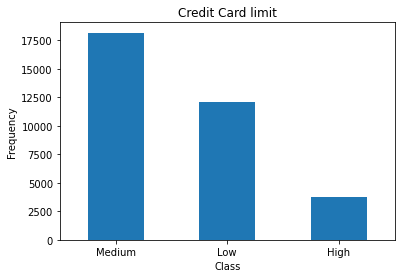

In [ ]:
count_classes = pd.value_counts(df_train['VAR21'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card limit")
#plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
#smk = SMOTETomek(random_state=42)
#X_res,y_res=smk.fit_sample(X,y)

In [ ]:
#X_res.shape,y_res.shape

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
#print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({2: 18172, 1: 12081, 0: 3747})


### Splitting

In [ ]:
# split data into train and test sets
seed = 42
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
#X_lead = sc_X.transform(X_lead)
X_train.shape

#### Fitting Model & Evaluation

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# fit model no training data
modelxgb = XGBClassifier()

In [ ]:
modelxgb.fit(X_train, y_train)

In [ ]:
# make predictions for test data
y_pred = modelxgb.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
y_pred

In [ ]:
#predictions

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

### K-Fold CV

In [ ]:
modelxgbkfold = XGBClassifier()

In [ ]:
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(modelxgbkfold, X_train, y_train, cv=kfold, scoring='accuracy')

In [ ]:
result.mean()

#### Leaderboard Prediction

In [ ]:
y_lead = modelxgb.predict(X_lead)

In [ ]:
y_lead_ = y_lead.tolist()

In [ ]:
len(lead_key)

In [ ]:
len(y_lead_)

In [ ]:
ylead = labelencoder_y.inverse_transform(y_lead_)

In [ ]:
ylead

In [ ]:
n_count_classes = pd.value_counts(ylead, sort = True)
n_count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card limit")
#plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
dfxyz = pd.DataFrame(ylead,lead_key)

In [ ]:
dfxyz.head()

In [ ]:
#dfxyz.to_csv('Anonymous_IITRoorkee_9.csv',header=False)

#### Feature Importance and Selection

In [ ]:
print(modelxgb.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

In [ ]:
col = df_train.columns[1:-1]
len(col)

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelxgb.feature_importances_, index=col)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### Hyper Parameter Tuning

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

target = 'VAR21'
IDcol = 'VAR1'

In [ ]:
train = df_train
train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,210.175146,NaN,NaN,NaN,1.558341,NaN,1,0,101.268503,High


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_y1 = LabelEncoder()
#labelencoder_x1 = LabelEncoder()
train.iloc[:,-1] = labelencoder_y1.fit_transform(train.iloc[:,-1].values)

In [ ]:
train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.0,1.0,1.540594,NaN,100.104991,1
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,NaN,1.614613,NaN,146.654045,0
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,210.175146,10.0,10.0,1.044599,NaN,98.249570,2
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,NaN,NaN,NaN,1.145729,NaN,140.862306,1
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,210.175146,NaN,NaN,1.558341,NaN,101.268503,0


In [ ]:
'''del train['VAR14']
del train['VAR18']
del train['VAR19']'''
del train['VAR10']
del train['VAR17']
del train['VAR15']

In [ ]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    #feat_imp = pd.Series(alg.feature_importances_, index = predictors)
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=700,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=1,
 colsample_bytree=1,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 random_state=27, reg_lambda=1)

#predictors


Model Report
Accuracy : 0.643


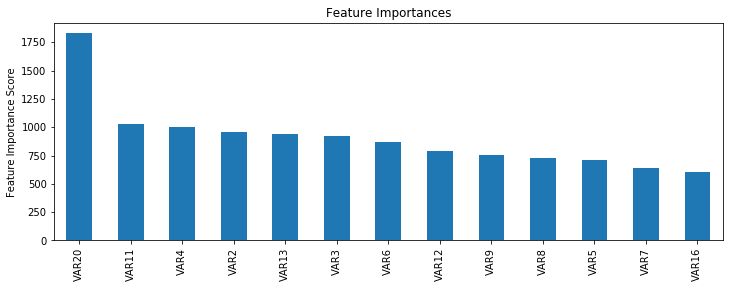

In [ ]:
modelfit(xgb1, train, predictors)

#### Leaderboard Prediction (Tuned XGBoost)

In [ ]:
lead = df_lead
lead_predictors = [x for x in lead.columns if x not in [IDcol]]
#lead_predictors

In [ ]:
#del lead['VAR1']
#del train['VAR1']
'''del lead['VAR1']
del lead['VAR14']
del lead['VAR18']
del lead['VAR19']'''
#del lead['VAR10']
del lead['VAR15']
del lead['VAR17']

In [ ]:
lead.columns = predictors

In [ ]:
lead_predictions = xgb1.predict(lead)

In [ ]:
dlead = lead_predictions.tolist()
len(lead_key), len(dlead)

(10000, 10000)

In [ ]:
dylead = labelencoder_y1.inverse_transform(lead_predictions)
dylead

array(['Medium', 'Low', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

Text(0, 0.5, 'Frequency')

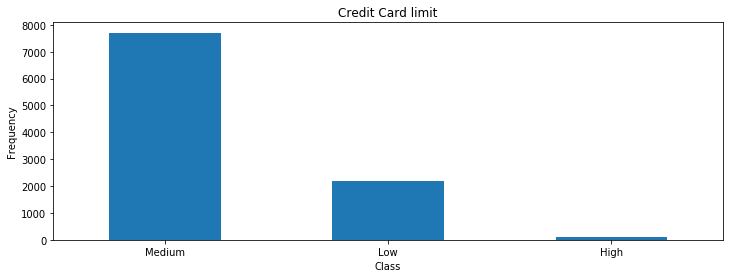

In [ ]:
n_count_classes = pd.value_counts(dylead, sort = True)
n_count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card limit")
#plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
fxy = pd.DataFrame(dylead,lead_key)
fxy.head()

,0
1,Medium
2,Low
3,Medium
4,Medium
5,Medium


In [ ]:
fxy.to_csv('Anonymous_IITRoorkee_34.csv', header=False)

#### Grid Search

In [ ]:
param_test1 = {
 'n_estimators':range(700, 1500,200)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=2, gamma=0.25, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])

NameError: ignored